In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

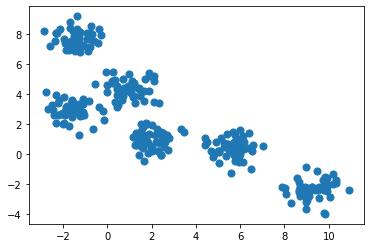

In [92]:
#Getting the data from skelarn blob 

from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 300, centers = 6, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:,0], X[:,1], s=50)

In [7]:
X[:,0]

array([ 8.36856841e-01, -1.41365810e+00,  1.15521298e+00, -1.01861632e+00,
        1.27135141e+00,  3.43761754e+00, -1.80822253e+00,  1.41372442e+00,
       -2.04932168e-01, -7.11099611e-01, -1.71237268e+00, -2.67000792e+00,
        1.24258802e+00, -2.22783649e+00,  1.45513831e+00,  4.53791789e-01,
        1.06923853e+00,  2.56936589e+00, -1.06690610e+00, -1.07859101e+00,
        2.71506328e+00,  1.77710994e+00,  7.34363910e-01, -1.99648151e+00,
       -1.91828017e+00, -5.55523811e-01,  1.69747910e+00,  5.94762432e-01,
       -2.88024255e+00,  1.86725632e-01, -5.13333436e-01, -2.05701103e+00,
        1.87271752e+00, -1.13121396e+00, -1.64428957e+00, -2.41933824e+00,
       -2.01606928e+00, -2.62142780e+00, -2.20299950e+00,  1.66382237e+00,
        6.69786996e-01, -1.98539037e+00, -4.74920358e-02,  1.54462126e+00,
       -1.70200643e+00, -1.02192525e+00, -1.37842552e+00, -1.55220688e+00,
       -1.47904303e+00,  1.98894313e+00, -1.94972418e+00,  2.45509737e+00,
       -8.94327882e-01,  

In [93]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [94]:
y_kmeans

array([5, 3, 6, 6, 2, 5, 6, 0, 5, 1, 3, 3, 0, 4, 5, 0, 0, 3, 2, 4, 3, 4,
       0, 1, 4, 0, 5, 2, 4, 4, 5, 3, 0, 3, 2, 6, 2, 6, 4, 2, 0, 4, 0, 2,
       3, 3, 3, 5, 5, 5, 1, 4, 5, 4, 3, 5, 4, 5, 3, 4, 3, 2, 2, 4, 1, 3,
       1, 3, 4, 5, 5, 4, 2, 4, 3, 6, 2, 1, 4, 0, 3, 6, 5, 0, 3, 3, 4, 2,
       3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 0, 1, 3, 0, 5, 5, 2, 4, 5, 0,
       4, 2, 2, 4, 0, 4, 6, 2, 2, 2, 0, 6, 4, 2, 2, 6, 5, 4, 4, 5, 5, 5,
       5, 4, 5, 1, 1, 1, 4, 5, 2, 3, 1, 4, 3, 0, 3, 3, 1, 0, 1, 0, 4, 6,
       0, 3, 1, 4, 0, 3, 0, 5, 1, 3, 6, 5, 0, 6, 0, 0, 5, 2, 4, 1, 0, 2,
       2, 0, 3, 5, 0, 6, 4, 5, 5, 0, 4, 2, 0, 4, 1, 2, 0, 0, 0, 5, 3, 4,
       0, 3, 0, 2, 4, 4, 1, 2, 4, 0, 2, 1, 5, 1, 0, 3, 4, 6, 2, 3, 2, 4,
       0, 0, 1, 4, 4, 5, 5, 0, 3, 5, 2, 4, 5, 4, 0, 1, 1, 2, 0, 3, 0, 5,
       4, 0, 1, 5, 1, 3, 6, 2, 0, 5, 3, 3, 1, 3, 4, 2, 5, 2, 4, 1, 2, 5,
       3, 0, 0, 6, 2, 1, 6, 0, 1, 2, 5, 5, 4, 4, 0, 2, 2, 2, 2, 3, 6, 5,
       2, 0, 5, 5, 5, 6, 4, 3, 2, 5, 5, 3, 3, 6])

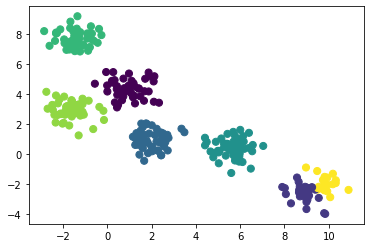

In [95]:
plt.scatter(X[:,0], X[:,1], c= y_kmeans,s = 50)

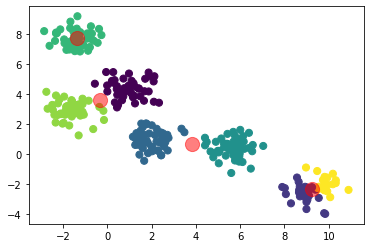

In [96]:
# Kmeans from scratch

from sklearn.metrics import pairwise_distances_argmin


def find_clusters(X,n_clusters, rseed = 2):

    #randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]


    while True:

        #2a. Assign labels based on the closest center
        labels = pairwise_distances_argmin(X,centers)

        #2b. Find new clusters from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        #2c. Check for convergence
        if np.all(centers == new_centers):
            break

        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X,4)


plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap= 'viridis')
plt.scatter(centers[:,0], centers[:,1], c='red', s = 200, alpha = 0.5)

## Finding clusters

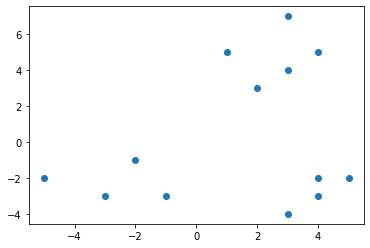

In [18]:
data = [(3,-4), (2,3), (-5,-2), (-3,-3), (3, 7), (5,-2), (4,5), (-2,-1), (3, 4), (1,5), (-1,-3), (4, -2), (4, -3)]

x = []
y = []

for i in range(len(data)):
    x.append(data[i][0])
    y.append(data[i][1])

plt.scatter(x,y)

In [28]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

In [29]:
y_kmeans

array([2, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 2])

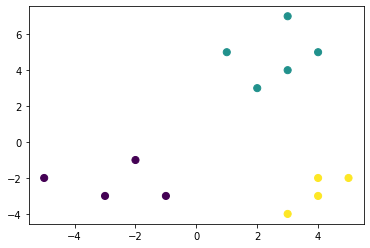

In [30]:
plt.scatter(x, y, c= y_kmeans,s = 50)

In [5]:

#Test code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/009/583/original/data_%281%29.csv?1661759124')

In [5]:
df

,X,Y
0,1,1.0
1,2,-3.0
2,2,4.0
3,-3,-1.0
4,4,-2.0
5,-5,-5.0
6,1,2.0
7,-1,-1.0
8,4,-5.0
9,2,-10.0


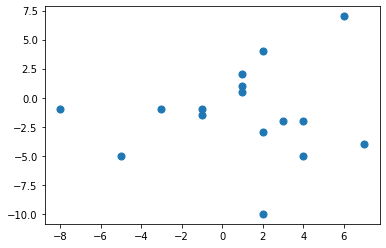

In [7]:
plt.scatter(df['X'], df['Y'],s = 50)

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(tuple(df.values))
y_kmeans = kmeans.predict(tuple(df.values))

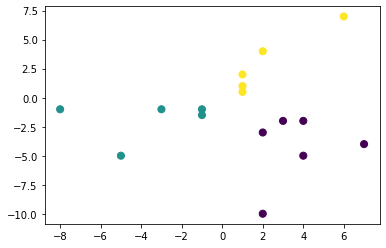

In [22]:
plt.scatter(df['X'], df['Y'], c=y_kmeans,s = 50)

In [17]:
for i in range(len(df)):
    tuple(df.values)

(array([1., 1.]),
 array([ 2., -3.]),
 array([2., 4.]),
 array([-3., -1.]),
 array([ 4., -2.]),
 array([-5., -5.]),
 array([1., 2.]),
 array([-1., -1.]),
 array([ 4., -5.]),
 array([  2., -10.]),
 array([1. , 0.5]),
 array([6., 7.]),
 array([ 7., -4.]),
 array([-8., -1.]),
 array([-1. , -1.5]),
 array([ 3., -2.]))

In [23]:
# Kmeans from scratch

from sklearn.metrics import pairwise_distances_argmin


def find_clusters(X,n_clusters, rseed = 2):

    #randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]


    while True:

        #2a. Assign labels based on the closest center
        labels = pairwise_distances_argmin(X,centers)

        #2b. Find new clusters from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        #2c. Check for convergence
        if np.all(centers == new_centers):
            break

        centers = new_centers

    return centers, labels

centers, labels = find_clusters(tuple(df.values),3)


plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap= 'viridis')
plt.scatter(centers[:,0], centers[:,1], c='red', s = 200, alpha = 0.5)

AttributeError: 'tuple' object has no attribute 'shape'

In [7]:

initial_centroids = np.array( [(1, 1), (-1, 1), (-1, 2)]) #modify as per the options
df = [(1,2),(2,3),(-1,-2),(3,4),(4,-2),(3,-3),(-5,-4),(3,10),(-3,-4),(7,9),(6,5),(3,-4),(-4,-3),(-1,-5),(-5,-8),(6,7),(4,-5),(0,0),(-3,-5)]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init = initial_centroids, random_state=0).fit(df)
lab = kmeans.labels_
colr = np.array(['r']*df.shape[0])
colr[lab==0] = 'y'
colr[lab==1] = 'b'
colr[lab==2] = 'c'
centroids = kmeans.cluster_centers_
import matplotlib.pyplot as plt
df.plot.scatter('X', 'Y', c = colr)
plt.axvline(x = 0, c = 'g')
plt.axhline(y = 0, c = 'g')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'r')

C:\Users\aniruddham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


AttributeError: 'list' object has no attribute 'shape'

## Elbow method

In [10]:
X[:,0]

array([ 8.36856841e-01, -1.41365810e+00,  1.15521298e+00, -1.01861632e+00,
        1.27135141e+00,  3.43761754e+00, -1.80822253e+00,  1.41372442e+00,
       -2.04932168e-01, -7.11099611e-01, -1.71237268e+00, -2.67000792e+00,
        1.24258802e+00, -2.22783649e+00,  1.45513831e+00,  4.53791789e-01,
        1.06923853e+00,  2.56936589e+00, -1.06690610e+00, -1.07859101e+00,
        2.71506328e+00,  1.77710994e+00,  7.34363910e-01, -1.99648151e+00,
       -1.91828017e+00, -5.55523811e-01,  1.69747910e+00,  5.94762432e-01,
       -2.88024255e+00,  1.86725632e-01, -5.13333436e-01, -2.05701103e+00,
        1.87271752e+00, -1.13121396e+00, -1.64428957e+00, -2.41933824e+00,
       -2.01606928e+00, -2.62142780e+00, -2.20299950e+00,  1.66382237e+00,
        6.69786996e-01, -1.98539037e+00, -4.74920358e-02,  1.54462126e+00,
       -1.70200643e+00, -1.02192525e+00, -1.37842552e+00, -1.55220688e+00,
       -1.47904303e+00,  1.98894313e+00, -1.94972418e+00,  2.45509737e+00,
       -8.94327882e-01,  

In [12]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,20):
    kmeans = KMeans(n_clusters = i, random_state= 42).fit(X)
    wcss.append(kmeans.inertia_)
    


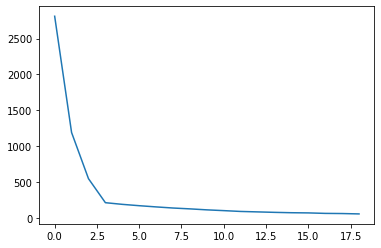

In [18]:
plt.plot(wcss)

#### Q1: K_means Code

Given the initialized centroids and points, complete the k_means() function to return the updated centroids after 10 iterations.

Sample Input:
- points = [(1,2),(3,4),(1,4),(0,4),(0,5),(-2,4),(-3,5),(6,-8),(5,6),(-1,-2),(3,-5),(4,-8),(5,-10),(-4,-4),(-2,-1),(0,0),(-3,0),(3,3),(4,4),(1,2),(6,7),(-9,0)]
- centroids = [(1,1),(-1,1),(-1,-1)]

Sample Output
- Centroids after 1th iteration: [(2.18, 3.73), (-4.25, 2.25), (1.57, -5.43)]
- Centroids after 2th iteration: [(2.18, 3.73), (-3.8, 1.6), (2.17, -6.17)]
- Centroids after 3th iteration: [(2.4, 4.1), (-3.0, 0.25), (4.5, -7.75)]
- Centroids after 4th iteration: [(2.4, 4.1), (-3.0, 0.25), (4.5, -7.75)]
- Centroids after 5th iteration: [(2.4, 4.1), (-3.0, 0.25), (4.5, -7.75)]
- Centroids after 6th iteration: [(2.4, 4.1), (-3.0, 0.25), (4.5, -7.75)]
- Centroids after 7th iteration: [(2.4, 4.1), (-3.0, 0.25), (4.5, -7.75)]
- Centroids after 8th iteration: [(2.4, 4.1), (-3.0, 0.25), (4.5, -7.75)]
- Centroids after 9th iteration: [(2.4, 4.1), (-3.0, 0.25), (4.5, -7.75)]
- Centroids after 10th iteration: [(2.4, 4.1), (-3.0, 0.25), (4.5, -7.75)]

In [57]:
#points is the list of tuples consisting of coordinates of points.
#centroids is the list of tuples consisting of coordinates of centroid points
import numpy as np

#Function to calculate the distance between two points
def calc_dist(p1, p2):
  return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

#Function to update the centroids of a cluster lst
def upd_centroid(lst):
  val_x, val_y = 0, 0
  for x,y in lst:
    val_x += x
    val_y += y
  return (np.round(val_x/len(lst), 2), np.round(val_y/len(lst), 2))

#Perform the k-means algorithm to cluster the points
def k_means(points, centroids):

  #groups is a 2d list where groups[i] will have all the points corresponding to the ith cluster
  groups = [[] for i in range(len(centroids))]
  for pnt in points:

    #tmp is a list to store the distance of points from each centroid. tmp[j] is the distance of jth centroid from pnt
    tmp = [0]*len(centroids)

    for i,centroid in enumerate(centroids):
      tmp[i] = calc_dist(pnt, centroid)
    
    #calculate the minimum distance from a centroid from all the centroid distances
    min_d = min(tmp)
    
    #find the index of minimum distance from tmp
    group_id = tmp.index(min_d)
    
    #store the point into the sublist of that nearest centroid
    groups[group_id].append(pnt)
  
  new_centroid = []

  #update the centroids of each cluster
  for lst in groups:
    #update the centroid
    new_centroid.append(upd_centroid(lst))
  return new_centroid
  


In [72]:
points = [(1,2),(3,4),(1,4),(0,4),(0,5),(-2,4),(-3,5),(6,-8),(5,6),(-1,-2),(3,-5),(4,-8),(5,-10),(-4,-4),(-2,-1),(0,0),(-3,0),(3,3),(4,4),(1,2),(6,7),(-9,0)]
centroids = [(1,1),(-1,1),(-1,-1)]

  
#Perform 10 iterations of k-means algorithm
for i in range(10):
  centroids_new = k_means(points, centroids)
  print('Centroids after ' + str(i+1) + 'th iteration: ',centroids_new)

groups: [[(1, 2), (3, 4), (1, 4), (0, 4), (0, 5), (5, 6), (0, 0), (3, 3), (4, 4), (1, 2), (6, 7)], [(-2, 4), (-3, 5), (-3, 0), (-9, 0)], [(6, -8), (-1, -2), (3, -5), (4, -8), (5, -10), (-4, -4), (-2, -1)], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
Centroids after 1th iteration:  None
groups: [[(1, 2), (3, 4), (1, 4), (0, 4), (0, 5), (5, 6), (0, 0), (3, 3), (4, 4), (1, 2), (6, 7)], [(-2, 4), (-3, 5), (-3, 0), (-9, 0)], [(6, -8), (-1, -2), (3, -5), (4, -8), (5, -10), (-4, -4), (-2, -1)], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
Centroids after 2th iteration:  None
groups: [[(1, 2), (3, 4), (1, 4), (0, 4), (0, 5), (5, 6), (0, 0), (3, 3), (4, 4), (1, 2), (6, 7)], [(-2, 4), (-3, 5), (-3, 0), (-9, 0)], [(6, -8), (-1, -2), (3, -5), (4, -8), (5, -10), (-4, -4), (-2, -1)], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
Centroids after 3th iteration:  None
groups: [[(1, 2), (3, 4), (1, 4), (0, 4), (

In [74]:
data = [(1,2),(2,3),(-1,-2),(3,4),(4,-2),(3,-3),(-5,-4),(3,10),(-3,-4),(7,9),(6,5),(3,-4),(-4,-3),(-1,-5),(-5,-8),(6,7),(4,-5),(0,0),(-3,-5)]

In [88]:
x = []
y = []
for i in range(len(data)):
    x.append(data[i][0])
    y.append(data[i][1])

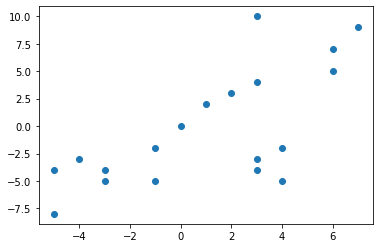

In [78]:
plt.scatter(x,y)

In [90]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10,init='k-means++').fit(data)
lab = kmeans.labels_

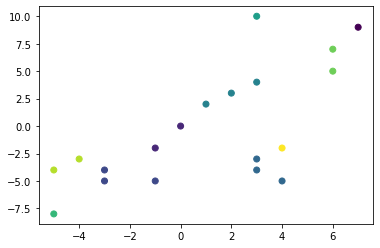

In [91]:
plt.scatter(x,y,c=lab)

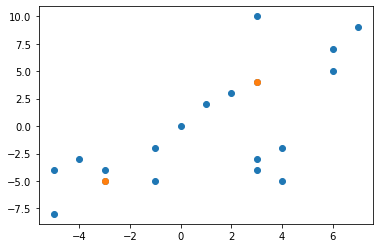

In [89]:
plt.scatter(x,y)
plt.scatter((-3,3),(-5,4))
plt.show()